In [2]:
!pip install pytube

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 374.2 kB/s eta 0:00:0031m1.3 MB/s eta 0:00:01


In [52]:
from pytube import YouTube
from pytube import Search


def downloadSongsAsMp3(url):

    # Provide the URL of the YouTube video you want to download
    video_url = url

    # Create a YouTube object
    yt = YouTube(video_url)

    # Choose the stream with the desired resolution and format
    #stream = yt.streams.get_highest_resolution()

    audio_streams = [(stream.bitrate, stream) for stream in yt.streams.filter(only_audio=True)]

    # Sort the list of tuples in descending order of bitrate
    audio_streams.sort(reverse=True)

    # Select the stream with the highest bitrate
    stream = audio_streams[0][1]
    # Specify the download path
    download_path = "./songs/anotherSet" 

    # Download the video
    #stream.download(output_path=download_path)
    stream.download(filename=f"{yt.title}.mp3")

    print("Download completed!")

    
def searchForSongs(songslist):
    linksList = []

    for song in songsList:
        s=Search(song)
        linksList.append(s.results[0].watch_url)
        
    return linksList

In [46]:
songsList = "Book Of Revelation, How It Ended, Book Of Stories, Blue Boy, Know, Do You Realize??, Up All Night, Stuff Is Way, Kiss Me, Son of God, Baby Britain, Pope Is a Rockstar, Chinese New Year, Sleepwalking (Couples Only Dance Prom Night), Suspirium, Black Swan, Renee, Venus In Furs, Breathe (In the Air), The Louvre, Los Angeles, Leader of a New Regime, Savage Good Boy, Roopaay, The Love Club, No More Lies, Homemade Dynamite (Feat. Khalid, Post Malone & SZA) - REMIX, If Not for You (2014 Remaster), Raindrops Keep Fallin' On My Head, Something - Remastered 2009, If I Ever Was a Child, Tangerine - Remaster, Let It Be - Remastered 2009, Rocket Man (I Think It's Going To Be A Long, Long Time), Charley's Girl, Love Me Two Times, Synchronize, Blossom, Blossom, Stolen Dance, Flashed Junk Mind, Head First, Goggles, This Life, Bryn, I'm Goin' Down - Recorded at Electric Lady Studios NYC, Diane Young, Holiday, Levitating, One Kiss (with Dua Lipa), I'll Be Your Mirror, Vad Hände Med Dem?, Don't Let's Start".split(",")

In [47]:
songsList[0:5]

['Book Of Revelation',
 ' How It Ended',
 ' Book Of Stories',
 ' Blue Boy',
 ' Know']

In [49]:
songsL = [x + " song" for x  in songsList]

In [55]:
listOfUrls = searchForSongs(songsL)

# downloading songs

for link in listOfUrls:
    try:
        downloadSongsAsMp3(link)
    except:
        print("Skipped one song")

Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term: Book Of Revelation
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term: Book Of Revelation
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  How It Ended
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  How It Ended
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Book Of Stories
Please open an issue at https://github.com/pytube/pytube/issues and provide

Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Post Malone & SZA) - REMIX
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Raindrops Keep Fallin' On My Head
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Raindrops Keep Fallin' On My Head
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Something - Remastered 2009
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term:  Something - Remastered 2009
Pl

Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Skipped one song
Download completed!
Download completed!
Download completed!
Skipped one song
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Download completed!
Downlo

## Documentation

The provided code implements the "Volatility Expansion Breakout Strategy" using a combination of Bollinger Bands, RSI, Stochastic Oscillator, and various exit conditions. Let's break down the strategy and its rationale:

1. **Bollinger Bands and Volatility**: The strategy identifies periods of low volatility based on Bollinger Bands. When the volatility is lower than 90% of the average volatility over the last 5 periods, and the RSI is above the defined oversold threshold, a buy signal is generated. This suggests that the stock might be consolidating within a narrow range and could potentially experience a breakout.

2. **Entry Signal**: When the above conditions are met, the strategy enters a long position (buys) in the stock.

3. **Resistance and Stochastic Exit**: If the price exceeds the recent resistance level (defined as the highest high of the last 5 periods), the strategy generates a sell signal. This could be due to the price approaching a significant resistance level, indicating potential resistance to further price increase. Additionally, if the Stochastic Oscillator exceeds the overbought level, it's considered an exit signal. This suggests that the stock might be overextended and due for a pullback.

4. **Stochastic Oversold Exit**: If the Stochastic Oscillator goes below the defined oversold level, the strategy generates an exit signal. This indicates that the stock might be oversold and due for a potential rebound.

5. **Trailing Stop Loss Exit**: The strategy incorporates a trailing stop loss mechanism. When in a position, the highest price since entry is tracked. If the current price drops by a certain percentage from the highest price, the strategy generates an exit signal. This mechanism aims to lock in profits if the price reverses after hitting a peak.

6. **Time-Based Exit**: As per the latest addition to the strategy, any open position will be closed after a certain number of days (10 days in this case). This is a simple time-based exit mechanism that helps manage risk and prevent being exposed to the market for extended periods.

The strategy aims to capitalize on potential breakouts during periods of low volatility, while also incorporating exit conditions based on resistance, Stochastic Oscillator levels, trailing stop loss, and a fixed time horizon.

Keep in mind that trading strategies can be complex and require thorough testing, validation, and potentially optimization on historical data before being used in live trading. Additionally, real-world market conditions and unexpected events can influence strategy performance. It's recommended to simulate and backtest the strategy extensively to understand its behavior before deploying it in a live trading environment.

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Buying now at 215.9499969482422 on 2021-02-19
Selling now at 222.1999969482422 on 2021-03-23 (Stochastic Overbought)
Buying now at 220.0500030517578 on 2021-04-01
Selling now at 205.35000610351562 on 2021-05-07 (Trailing Stop)
Buying now at 212.25 on 2021-05-14
Selling now at 207.85000610351562 on 2021-06-16 (Stochastic Oversold)
Buying now at 205.10000610351562 on 2021-06-22
Selling now at 201.85000610351562 on 2021-07-13 (Stochastic Oversold)
Buying now at 207.89999389648438 on 2021-07-16
Selling now at 206.8000030517578 on 2021-07-20 (Stochastic Overbought)
Buying now at 211.14999389648438 on 2021-07-26
Selling now at 205.75 on 2021-08-24 (Stochastic Oversold)
Buying now at 211.3000030517578 on 2021-08-31
Selling now at 236.60000610351562 on 2021-10-22 (5% UpperLimit Reached)
Buying now at 226.85000610351562 on 2021-11-01
Selling now at 221.89999389648438 on 2021-12-01 (Stochasti

<IPython.core.display.Javascript object>


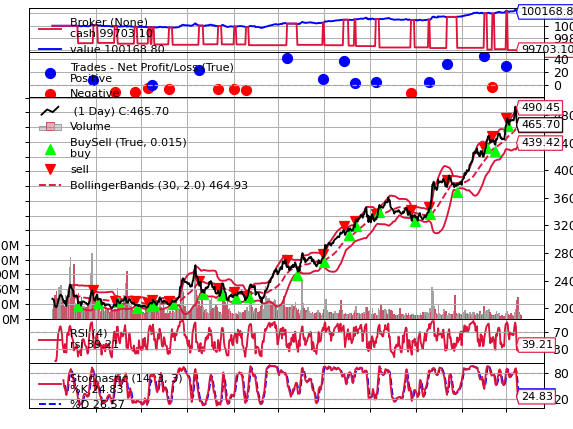

In [85]:
import backtrader as bt
import yfinance as yf

class VolatilityExpansionBreakoutStrategy(bt.Strategy):
    params = (
        ('bbands_period', 30),        # Bollinger Bands period
        ('bbands_devfactor', 2.0),    # Bollinger Bands deviation factor
        ('rsi_period', 4),           # RSI period
        ('rsi_oversold', 10),         # RSI oversold threshold (buy signal)
        ('stoch_period', 14),         # Stochastic oscillator period
        ('stoch_overbought', 70),     # Stochastic overbought level
        ('stoch_oversold', 20),       # Stochastic oversold level
        ('trailing_stop_percent', 0.03),  # Trailing stop percentage for exit
        ('time_exit_days', 5),       # Time-based exit days
    )

    def __init__(self):
        self.bbands = bt.indicators.BollingerBands(self.data.close, period=self.params.bbands_period, devfactor=self.params.bbands_devfactor)
        self.rsi = bt.indicators.RSI(self.data, period=self.params.rsi_period)
        self.stochastic = bt.indicators.Stochastic(period=self.params.stoch_period)
        self.trailing_stop_percent = self.params.trailing_stop_percent
        self.trailing_stop = None
        self.buying_price = None
        self.total_trades = 0
        self.winning_trades = 0
        self.highest_price = None  # Keep track of the highest price reached
        self.entry_datetime = None  # Track entry datetime for time-based exit

    def next(self):
        # Calculate the volatility of the current bar
        current_volatility = self.bbands.lines.bot[0] - self.bbands.lines.top[0]
        avg_volatility = sum([self.bbands.lines.bot[i] - self.bbands.lines.top[i] for i in range(-1, -6, -1)]) / 5

        if current_volatility < 0.9 * avg_volatility:
            if not self.position and self.rsi[0] > self.params.rsi_oversold:
                self.buy()
                self.buying_price = self.data.close[0]
                self.trailing_stop = self.buying_price * (1.0 - self.trailing_stop_percent)
                self.highest_price = self.buying_price  # Initialize highest_price
                self.trailing_stop = self.buying_price * (1.0 - self.trailing_stop_percent)
                self.entry_datetime = self.data.datetime.date(0)  # Record entry datetime

                print(f"Buying now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()}")
        else:
            if self.position:
                resistance = max(self.data.high.get(size=5))
                stoch_value = self.stochastic.lines.percK[0]
                self.highest_price = max(self.highest_price, self.data.high[0])  # Update highest_price
                elapsed_days = (self.data.datetime.date(0) - self.entry_datetime).days


                if self.data.close[0] >= resistance:
                    self.sell()
                    self.total_trades += 1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades += 1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()} (Resistance)")
                elif stoch_value > self.params.stoch_overbought:
                    self.sell()
                    self.total_trades += 1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades += 1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()} (Stochastic Overbought)")
                elif stoch_value < self.params.stoch_oversold:
                    self.sell()
                    self.total_trades += 1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades += 1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()} (Stochastic Oversold)")
                elif self.data.close[0] > self.buying_price + (self.buying_price * 0.05):
                    self.sell()
                    self.total_trades+=1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades += 1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()} (5% UpperLimit Reached)")
                    
                elif self.data.close[0] <= self.trailing_stop:  # Check trailing stop
                    self.sell()
                    self.total_trades += 1
                    if self.data.close[0] > self.buying_price:
                        self.winning_trades += 1
                    print(f"Selling now at {self.data.close[0]} on {self.data.datetime.date(0).isoformat()} (Trailing Stop)")

                # Check for time-based exit
               

    def get_metrics(self):
        if self.total_trades == 0:
            return None
        win_rate = (self.winning_trades / self.total_trades) * 100
        return {'Total Trades': self.total_trades, 'Winning Trades': self.winning_trades, 'Win Rate': win_rate}

if __name__ == '__main__':
    cerebro = bt.Cerebro()

    # Add your desired cash amount here (defaulting to 10000)
    start_cash = 100000
    cerebro.broker.set_cash(start_cash)

    # Add the data feed
    data = yf.download('itc.ns', start='2021-01-01', end='2023-08-01')
    data = bt.feeds.PandasData(dataname=data)

    cerebro.adddata(data)
    cerebro.addstrategy(VolatilityExpansionBreakoutStrategy)

    print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

    # Run the strategy
    results = cerebro.run()

    # Print the metrics
    strategy = results[0]
    metrics = strategy.get_metrics()
    if metrics is not None:
        print(f"Total Trades: {metrics['Total Trades']}, Winning Trades: {metrics['Winning Trades']}, Win Rate: {metrics['Win Rate']:.2f}%")

    # Print the final portfolio value
    print(f'Ending Portfolio Value: {cerebro.broker.getvalue():.2f}')

    cerebro.plot()


In [48]:
from datetime import date

In [59]:
data.datetime[0]

736023.0